### Задачи
- обход inorder, preorder, postorder (рекурсия и итеративный)
- обход в глубину (рекурсия и итеративный)
- обход в ширину (рекурсия и итеративный)
- поиск минимума, максимума
- поиск предыдущего, следующего
- поиск высоты: рекурсивно, стеком, кешами
- АВЛ: пересчет кеша высоты, вставка, удаление
- АВЛ: левое/правое большое/малое вращение
- обращение по индексу, размер поддерева (и пересчет кеша)
- разрезание, склеивание
- полный пересчет кешей и проверка корректности

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import networkx as nx

In [2]:
class TreeNode:
    def __init__(self):
        self.key = self.left = self.right = None


def parse_tree(lines):
    if isinstance(lines, str):
        lines = lines.split(';') if lines else []
    tree = [TreeNode() for _ in range(len(lines))]
    for num, line in enumerate(lines):
        if isinstance(line, str):
            key, left, right = map(int, line.strip().split())
        tree[num].key = key
        tree[num].num = num
        if left != -1:
            tree[num].left = tree[left]
        if right != -1:
            tree[num].right = tree[right]
    return tree[0] if tree else None


def draw_tree(tree, root=0,
              width=.07, vgap=.05, vloc=0, xcenter=.5,
              node_color='lightgray', node_size=1000,
              **kw):
    if isinstance(tree, str):
        tree = parse_tree(tree)
    if tree is None:
        return

    def add_node(node):
        num = node.num
        if num not in graph.nodes:
            graph.add_node(num)
            labels[num] = str(node.key)
        left = node.left
        if left is not None:
            add_node(left)
            graph.add_edge(num, left.num)
            labels[left.num] += '<'
        right = node.right
        if right is not None:
            add_node(right)
            graph.add_edge(num, right.num)
            labels[right.num] += '>'

    graph = nx.Graph()
    labels = {}
    add_node(tree)

    def layout_hier(root, width, vloc, xcenter, pos=None, parent=None):
        if pos is None:
            pos = { root: (xcenter, vloc) }
        else:
            pos[root] = (xcenter, vloc)
        neighbors = list(graph.neighbors(root))
        if parent is not None:
            neighbors.remove(parent)
        if len(neighbors):
            dx = width / len(neighbors) 
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                pos = layout_hier(neighbor, width=dx, vloc=vloc-vgap, xcenter=nextx,
                                  pos=pos, parent=root)
        return pos

    pos = layout_hier(root, width, vloc, xcenter)
    return nx.draw(graph, pos=pos, with_labels=True, labels=labels,
                   node_color=node_color, node_size=node_size,
                   **kw)

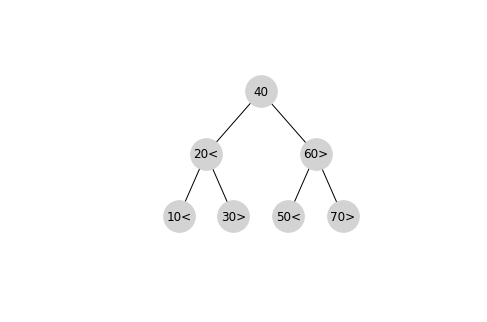

In [3]:
draw_tree('40 1 4;20 2 3;10 -1 -1;30 -1 -1;60 5 6;50 -1 -1;70 -1 -1')

In [4]:
def test_methods(validate):
    assert 1+1 == 2
    
    print('ok')

In [5]:
%%writefile tree-methods.py
print('OK', input())

Overwriting tree-methods.py


In [6]:
%%bash
python3 tree-methods.py << EOF
boy
EOF
# OK boy

OK boy
